The objective of this software is to detect road lanes and traffic signs from images (frames of videos) taken from cameras installed in vehicles for applications like autonomous driving or driving assistance.

In [1]:
import numpy as np
from scipy import signal
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, fixed, widgets
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
images_path = './images/'

Before applying any detection algorithm, we should apply some preprocesing techniques like smothing or histogram equalization in order to improve the images quality. We are going to use the median filter since it works well with different types of noise and has a low computational cost compared to other techniques like image averaging. 

### **<span style="color:blue"><b><i>Image preprocessing</i></b></span>**

In [2]:
def median_filter(image, window_aperture):
    """ Applies median filter to an image and display it.   
        Args:
            image: Input image
            w_window: window aperture size
            verbose: Only show images if this is True
        Returns:
            smoothed_img: smoothed image 
    """
    smoothed_image = np.copy(image)
    smoothed_image = cv2.medianBlur(image, window_aperture * 2 + 1)   
    return smoothed_image

def equalize_chart(image):
    """ Applies histogram equalization to an image and shows the result.   
        Args:
            image: Input image
            verbose: Only show images if this is True 
        Returns:
            out_image: Equalized histogram image
    """
    #Transform image to YCrCb color space
    out_image = np.copy(image)
    out_image = cv2.cvtColor(out_image, cv2.COLOR_BGR2YCrCb)
    
    # Apply histogram equalization to first band of the YCrCb image
    out_image[:,:,0] = cv2.equalizeHist(out_image[:,:,0])

    # Reconvert image to RGB
    out_image = cv2.cvtColor(out_image, cv2.COLOR_YCrCb2RGB)

    return out_image

### **<span style="color:blue"><b><i>Test</i></b></span>**

Text(0.5, 1.0, 'Equalized histogram image')

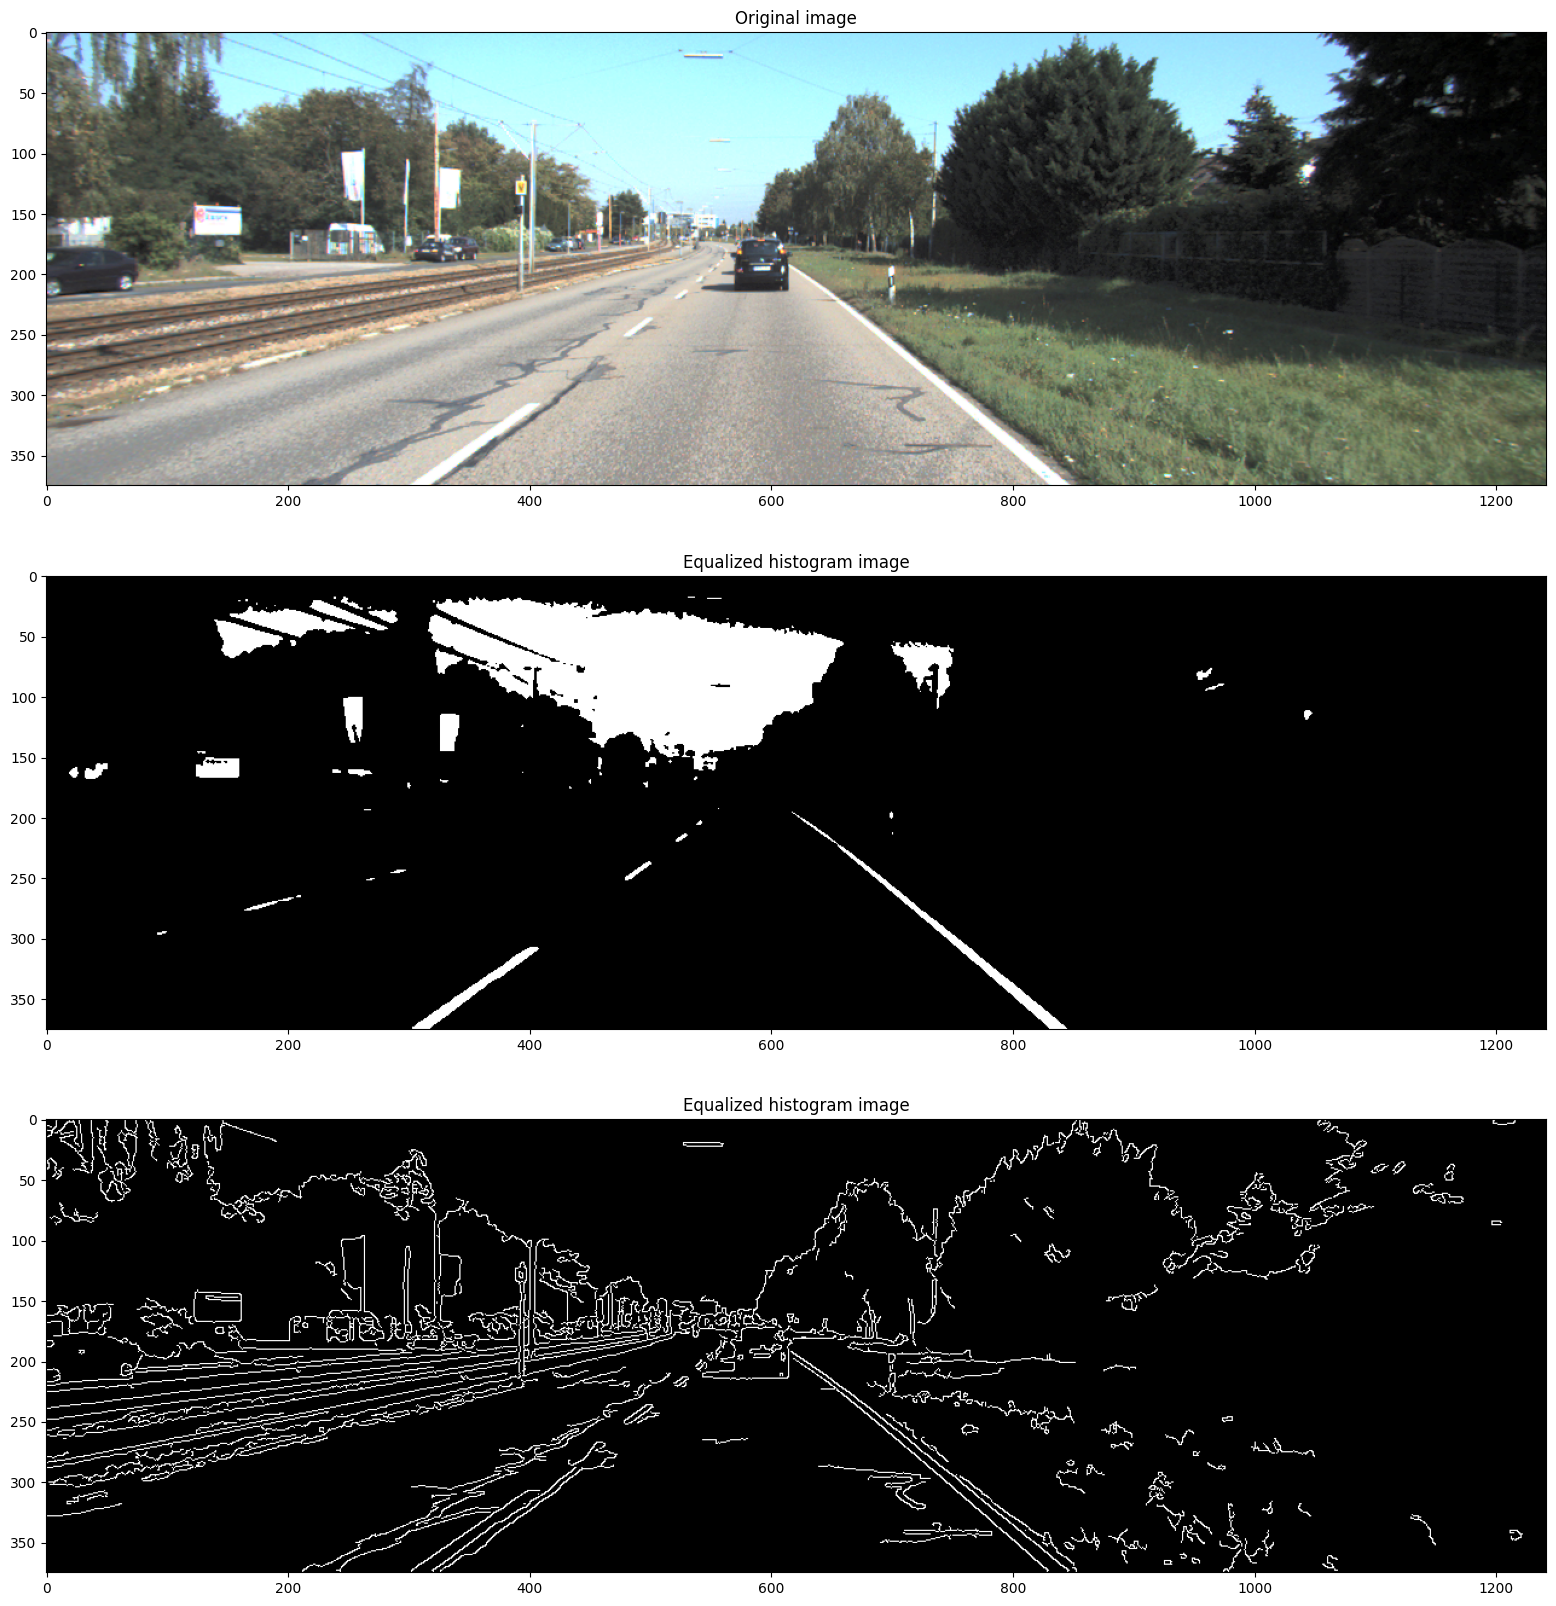

In [21]:
image = cv2.imread(images_path + 'road.png',-1)

image = equalize_chart(image)

processed_image = np.copy(image)
processed_image = cv2.cvtColor(processed_image, cv2.COLOR_RGB2GRAY)
 
# processed_image = median_filter(processed_image, 1)

processed_image = cv2.GaussianBlur(processed_image, (5,5), 0)

canny_image = cv2.Canny(processed_image,50,150)

# Use the Hough Line Transform to detect lines in the image
edges = cv2.HoughLines(canny_image, 1, np.pi / 180, threshold)

rec, processed_image = cv2.threshold(processed_image,230,255,cv2.THRESH_BINARY)

# Show the initial image
plt.subplot(3, 1, 1)
plt.imshow(image)
plt.title('Original image')

# Show the resultant one
plt.subplot(3, 1, 2)
plt.imshow(processed_image, cmap='gray')
plt.title('Equalized histogram image')

plt.subplot(3, 1, 3)
plt.imshow(canny_image, cmap='gray')
plt.title('Equalized histogram image')

In [ ]:
def gaussian_smoothing(image, sigma, w_kernel):
    """ Blur and normalize input image.   
    
        Args:
            image: Input image to be binarized
            sigma: Standard deviation of the Gaussian distribution
            w_kernel: Kernel aperture size
                    
        Returns: 
            smoothed_norm: Blurred image
    """   
    # Write your code here!
    
    # Define 1D kernel
    s=sigma
    w=w_kernel
    kernel_1D = np.array([gaussian_bell(x, s) for x in range(-w,w+1)])
    
    # Apply distributive property of convolution
    vertical_kernel = kernel_1D.reshape(2*w+1,1)
    horizontal_kernel = kernel_1D.reshape(1,2*w+1)   
    gaussian_kernel_2D = signal.convolve2d(vertical_kernel, horizontal_kernel)   
    
    # Blur image
    smoothed_img = cv2.filter2D(image, cv2.CV_8U, gaussian_kernel_2D)
    
    # Normalize to [0 254] values
    smoothed_norm = np.array(image.shape)
    smoothed_norm = cv2.normalize(smoothed_img, None, 0, 255, cv2.NORM_MINMAX) # Leave the second argument as None
    
    return smoothed_norm

def gaussian_bell(x, sigma):
    result = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x**2)/(2*(sigma**2)))
    return result

In [ ]:
def canny_testing(image, lower_threshold, upper_threshold, sigma, w_gaussian):
    """ Apply Canny algorithm to an image.   
    
        Args:
            image: Input image to be binarized
            lower_threshold: bottom value for hysteresis
            upper_threshold: top value for hysteresis
            sigma: Standard deviation of the Gaussian distribution
            w_gaussian: Gaussian kernel aperture size
    """  
    
    # Smooth image
    blurred_img = gaussian_smoothing(image,sigma,w_gaussian)
    
    # Apply Canny to blurred image
    canny_blurred = cv2.Canny(blurred_img,lower_threshold,upper_threshold)

    # Show initial image
    plt.subplot(211)
    plt.imshow(image, cmap='gray')
    plt.title('Original image')
    
    # Show Canny with blurring
    plt.subplot(212)
    plt.imshow(canny_blurred, cmap='gray')
    plt.title('Canny smoothed')

In [ ]:
interact(canny_testing, image=fixed(image), lower_threshold=(0,260,20), upper_threshold=(0,260,20), sigma=(1,3,0.1), w_gaussian=(1,3,1));